In [39]:
import tweepy
import webbrowser 
import time
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import html
import preprocessor as pp
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mayar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mayar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


## Getting data from SNScrape

In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

hashtags = ['abortion', 'prolife', 'prochoice']
years = ['2016','2017','2018','2019']

for hashtag in hashtags:
    for year in years:
        
        # Creating list to append tweet data to
        tweets_list = []
        # Using TwitterSearchScraper to scrape data and append tweets to list
        for i,tweet in enumerate(sntwitter.TwitterSearchScraper('{} since:{}-01-01 until:{}-12-31 lang:"en"'.format(hashtag, year, year)).get_items()):
            if i>50000:
                break
            tweets_list.append([tweet.date, tweet.id, tweet.content, tweet.username]) 
            if i % 1000 == 0 and i != 0:
                print(i)
        # Creating a dataframe from the tweets list above 
        tweets_df = pd.DataFrame(tweets_list, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])
        tweets_df.to_csv("{}_{}.csv".format(hashtag, year), encoding='utf-8-sig', index=False)

## Setting Twitter API

In [ ]:
consumer_apikey = "Fkv4Ky7IFutEzVYVjLAosoG86"
consumer_apisecretkey = "jr0IpDuFR5tcDGAhoIuQgR0ZU0w2iLHeFU5wVbwGb0xJFQtCHN"
callback_url = "oob" #https://cfe.sh/twitter/callback
auth = tweepy.OAuthHandler(consumer_apikey, consumer_apisecretkey, callback_url)
redirect_url = auth.get_authorization_url()

In [ ]:
webbrowser.open(redirect_url)

In [ ]:
user_pint_input = input("What's the pin value? ")

In [ ]:
auth.get_access_token(user_pint_input)

In [ ]:
api = tweepy.API(auth, wait_on_rate_limit=True)

## Detecting Gender 

In [ ]:
df

In [ ]:
from gender_detector import gender_detector as gd

In [ ]:
detector = gd.GenderDetector('us') # It can also be ar, uk, uy.

In [ ]:
gender = []
for name in list(df['Name']):
    gender.append(detector.guess(name))
df['Gender'] = gender

In [ ]:
df

In [ ]:
import gender_guesser.detector as gender


In [ ]:
d = gender.Detector(case_sensitive=False)

In [ ]:
gender2 = []
for name in list(df['Name']):
    gender2.append(d.get_gender(u"{}".format(name), u'usa'))
df['Gender2'] = gender2

In [ ]:
df

## Getting Info fromTwitter API

In [ ]:
def GettingAddInfo(df):
    locations = []
    names = []
    user_ids = []
    for i,tweet in enumerate(list(df['Tweet Id'])):
        try:
            tweet_info = api.get_status(tweet)
            locations.append(tweet_info.user.location)
            names.append(tweet_info.user.name)
            user_ids.append(tweet_info.user.id)
            print(i)
        except tweepy.TweepError:
            locations.append("")
            names.append("")
            user_ids.append("")
            print("Failed to run the command on that user, Skipping...")
    df['Location'] = locations
    df['Name'] = names
    df['User_Id'] = user_ids
    
    return df

#### Abortion 2016

In [ ]:
import pandas as pd
file = "abortion_2016.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Abortion 2017

In [ ]:
import pandas as pd
file = "abortion_2017.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Abortion 2018

In [ ]:
import pandas as pd
file = "abortion_2018.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prolife 2016

In [ ]:
import pandas as pd
file = "prolife_2016.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prolife 2017

In [ ]:
import pandas as pd
file = "prolife_2017.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prolife 2018

In [ ]:
import pandas as pd
file = "prolife_2018.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prochoice 2016

In [ ]:
import pandas as pd
file = "prochoice_2016.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prochoice 2017

In [ ]:
import pandas as pd
file = "prochoice_2017.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

#### Prochoice 2018

In [ ]:
import pandas as pd
file = "prochoice_2018.csv"
df = pd.read_csv(file)
df['Noisy'] =  file.split('_')[0]
df = GettingAddInfo(df)
df.to_csv("{}_extended.csv".format(file.split('.')[0]), encoding='utf-8-sig', index=False)

## Putting Data together and Filtering by Location

In [155]:
hashtags = ['abortion', 'prolife', 'prochoice']
years = ['2016','2017','2018']

file_names = []
for hashtag in hashtags:
    for year in years:
        file_names.append(hashtag+'_'+year+'_extended.csv')

In [156]:
#Concatenating the files
temp_df = (pd.read_csv(f) for f in file_names)
final_df = pd.concat(temp_df, ignore_index=True)

In [157]:
#Dictionary to filter by location
dictionary = {'States': 'Alaska|Alabama|Arkansas|Arizona|California|Colorado|Connecticut|District|of|Columbia|Delaware|Florida|Georgia|Hawaii|Iowa|Idaho|Illinois|Indiana|Kansas|Kentucky|Louisiana|Massachusetts|Maryland|Maine|Michigan|Minnesota|Missouri|Mississippi|Montana|North|Carolina|North|Dakota|Nebraska|New|Hampshire|New|Jersey|New|Mexico|Nevada|New|York|Ohio|Oklahoma|Oregon|Pennsylvania|Rhode|Island|South|Carolina|South|Dakota|Tennessee|Texas|Utah|Virginia|Vermont|Washington|Wisconsin|West|Virginia|Wyoming|AL|AK|AZ|AR|CA|CO|CT|DC|DE|FL|GA|HI|ID|IL|IN|IA|KS|KY|LA|ME|MD|MA|MI|MN|MS|MO|MT|NE|NV|NH|NJ|NM|NY|NC|ND|OH|OK|OR|PA|RI|SC|SD|TN|TX|UT|VT|VA|WA|WV|WI|WY|US|USA|United States'}

In [158]:
final_df['Location'] = final_df['Location'].replace({None: " "})
df_filtered = final_df.loc[(final_df['Location'].str.contains(dictionary['States']))].reset_index(drop=True)

In [159]:
df_filtered['Datetime']= pd.to_datetime(df_filtered['Datetime'])
df_filtered['Year'] = pd.DatetimeIndex(df_filtered['Datetime']).year
del df_filtered["Datetime"]

In [163]:
df_filtered.shape

(198215, 8)

In [165]:
df_filtered.drop_duplicates(subset=['Tweet Id'], inplace=True)

In [166]:
df_filtered.to_csv("df_filtered.csv", index=False)

In [168]:
df_filtered.shape

(174389, 8)

## Cleaning the data

In [199]:
df = pd.read_csv("df_filtered.csv")

In [200]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016


#### Extract hashtags from Tweets

In [201]:
df['hashtags'] = df.Text.apply(lambda x: re.findall(r"#(\w+)", x)) 

In [202]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016,"[Downsyndrome, Abortion]"
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016,[ProLife]
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016,[]
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016,[]
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016,[]


#### Get top 15 hashtags

In [203]:
hashtag_series = df.hashtags
hashtag_series = hashtag_series.apply(pd.Series).stack().reset_index(drop=True)
hashtag_series = hashtag_series.str.lower()
df_hashtag = hashtag_series.value_counts().to_frame().rename(columns={0: "Count"})
df_hashtag[:15]

,Count
prochoice,45831
prolife,45609
abortion,14748
uniteblue,11140
feminism,7396
plannedparenthood,5869
pjnet,4086
unbornlivesmatter,3895
tcot,2551
maga,2081


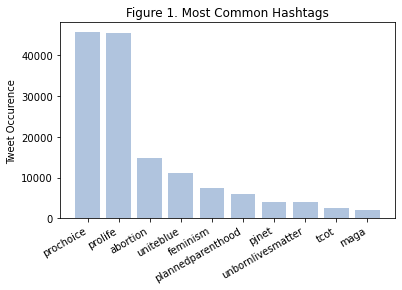

In [256]:
fig, ax = plt.subplots()

ax.bar(df_hashtag[:10].index, df_hashtag[:10].Count, \
       align="center", \
      color="lightsteelblue")

plt.ylabel('Tweet Occurence')
plt.title('Figure 1. Most Common Hashtags')
fig.autofmt_xdate()

plt.show()

#### User Statistics

In [205]:
df.User_Id.nunique()

62101

In [206]:
df.User_Id.value_counts().mean()

2.8081512375002013

In [207]:
df.User_Id.value_counts().std()

47.67622996433315

## Preprocessing Data

1. re.sub('@[^\s]+','',Tweet)
2. df['Great'] = df["Summary"].str.contains("great", case=False, na=False).astype(int) - check text processing https://stackoverflow.com/questions/32398024/read-tweets-extracted-with-python - try encoding when reading file
3. Did basic sanity checks to detect presence of UTF-BOM characters. None found.
4.Replace '\n', '\r' with "" at some point - https://stackoverflow.com/questions/16566268/remove-all-line-breaks-from-a-long-string-of-text
5.These did not work for punctuations: df.clean_tweet = df.clean_tweet.apply(lambda x: x.replace('[{}]'.format(string.punctuation), '')) ----- str.replace('[{}]'.format(string.punctuation), '') ----df.clean_tweet = df.clean_tweet.apply(lambda x: x.replace('[^\w\s]',''))

In [220]:
df["Clean_tweet"] = df.Text

In [221]:
#Step 1: Decode html escape characters: &amp &quote etc - should remove these altogether?
#df.test2 = df.test2.apply(lambda x: html.unescape(x))
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub(r'&[a-z]+;', '', x))

In [223]:
#Sanity check
df['Check'] = df.Clean_tweet.str.contains("&", case=False, na=False).astype(int) # Checked for &gt, &amp &#62 &quote
print(sum(df.Check))

0


In [224]:
#Step 2: Remove @mentions
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub('@[^\s]+','',x))
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub('@[^\w]+','',x))
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub('@','',x))

In [225]:
#Step 3 Remove \n \t \r
df.Clean_tweet = df.Clean_tweet.apply(lambda x: x.replace('\n', '').replace('\t', '').replace('\r', ''))

In [226]:
#Step 4: Tweet-preprocessor to remove, urls, emojis, hashtags, reserved words, mentions (if any), smileys
df.Clean_tweet = df.Clean_tweet.apply(lambda x: pp.clean(x))

In [227]:
#Step 5: Remove Placeholders
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub(r'{link}', '', x))
df.Clean_tweet = df.Clean_tweet.apply(lambda x: re.sub(r"\[video\]", '', x))

In [228]:
#Step 6: Remove punctuations, digits
#Create helper function
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

def remove_digits(text):
    for digit in string.digits:
        text = text.replace(digit, '')
    return text

df.Clean_tweet = df.Clean_tweet.apply(remove_punctuations)
df.Clean_tweet = df.Clean_tweet.apply(remove_digits)

In [229]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags,Clean_tweet,Check
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016,"[Downsyndrome, Abortion]",Women Deserve the Truth About Down Syndrome an...,0
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016,[ProLife],How about Abortion you advocate forThats curre...,0
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016,[],I hate abortion but same people that would for...,0
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016,[],If only prolife activists spent as much time t...,0
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016,[],I wish her mom had an abortion,0


In [230]:
#Step 7 Lowercase before tokenization
df.Clean_tweet = df.Clean_tweet.str.lower()

In [231]:
#Step 7 Tokenization
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)

In [232]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags,Clean_tweet,Check
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016,"[Downsyndrome, Abortion]",women deserve the truth about down syndrome an...,0
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016,[ProLife],how about abortion you advocate forthats curre...,0
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016,[],i hate abortion but same people that would for...,0
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016,[],if only prolife activists spent as much time t...,0
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016,[],i wish her mom had an abortion,0


In [233]:
df["Tok_tweet"] = df.Clean_tweet.apply(lambda x: tknzr.tokenize(x))

In [234]:
#Step 8 Remove stopwords 
#Create helper function

stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df.Tok_tweet = df.Tok_tweet.apply(lambda x: remove_stopwords(x))

In [235]:
#Step 9 Lemmatization
#Create helper function

lem = nltk.WordNetLemmatizer()

def lemmat(text):
    text = [lem.lemmatize(word) for word in text]
    return text

df.Tok_tweet = df.Tok_tweet.apply(lambda x: lemmat(x))

In [236]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags,Clean_tweet,Check,Tok_tweet
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016,"[Downsyndrome, Abortion]",women deserve the truth about down syndrome an...,0,"[woman, deserve, truth, syndrome, prenatal, te..."
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016,[ProLife],how about abortion you advocate forthats curre...,0,"[abortion, advocate, forthats, current, mass, ..."
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016,[],i hate abortion but same people that would for...,0,"[hate, abortion, people, would, force, child, ..."
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016,[],if only prolife activists spent as much time t...,0,"[prolife, activist, spent, much, time, trying,..."
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016,[],i wish her mom had an abortion,0,"[wish, mom, abortion]"


In [237]:
##Create word cloud
df["cloud"] = df.Tok_tweet.apply(lambda x: ' '.join([str(elem) for elem in x]))

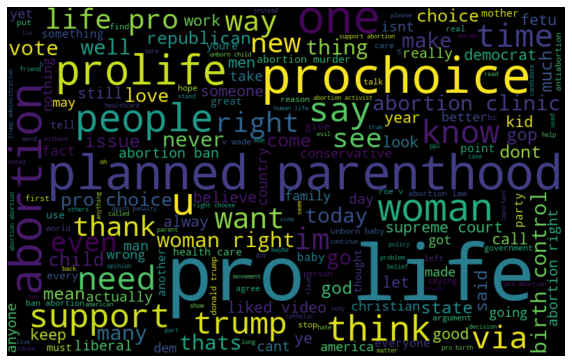

In [238]:
all_words = ' '.join([text for text in df.cloud])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [239]:
df.head()

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags,Clean_tweet,Check,Tok_tweet,cloud
0,8.150000e+17,Women Deserve the Truth About Down Syndrome an...,LifeNewsToo,abortion,USA,LifeNews,7.455226e+07,2016,"[Downsyndrome, Abortion]",women deserve the truth about down syndrome an...,0,"[woman, deserve, truth, syndrome, prenatal, te...",woman deserve truth syndrome prenatal testing
1,8.140000e+17,@Cagsil @ivotedhillary \nHow about Abortion yo...,itzMeiVo,abortion,"Indianapolis, IN USA",MAGAFAM,8.090000e+17,2016,[ProLife],how about abortion you advocate forthats curre...,0,"[abortion, advocate, forthats, current, mass, ...",abortion advocate forthats current mass killin...
2,8.130000e+17,"@SenSanders. I hate abortion, but same people ...",Batt6C,abortion,United States,Will 2017,7.870000e+17,2016,[],i hate abortion but same people that would for...,0,"[hate, abortion, people, would, force, child, ...",hate abortion people would force child young g...
3,8.120000e+17,If only pro-life activists spent as much time ...,danielle_browni,abortion,"Boulder, CO",🌻 danielle,2.830944e+09,2016,[],if only prolife activists spent as much time t...,0,"[prolife, activist, spent, much, time, trying,...",prolife activist spent much time trying help k...
4,8.110000e+17,@TIME @motto I wish her mom had an abortion.,DioxaV,abortion,"New York, NY",Dioxazine Violet,2.204231e+09,2016,[],i wish her mom had an abortion,0,"[wish, mom, abortion]",wish mom abortion


In [240]:
#df.to_csv('df_final.csv', encoding='utf-8-sig', index=False)

## VADER Sentiment Analysis Identification

In [241]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [242]:
def sentiment_class(x):
    if x['compound'] >= 0.05:
        return "positive"
    elif (x['compound'] > -0.05) and (x['compound']<0.05):
        return "neutral"
    elif x['compound']<=-0.05:
        return "negative"
    
analyzer = SentimentIntensityAnalyzer()

def sentiment(x):
    return analyzer.polarity_scores(x)   

In [243]:
df['sentiment'] = df['Text'].apply(sentiment)

In [244]:
df['sentimentclass']= df['sentiment'].apply(sentiment_class)

In [245]:
df[df['sentimentclass'] =='neutral']

,Tweet Id,Text,Username,Noisy,Location,Name,User_Id,Year,hashtags,Clean_tweet,Check,Tok_tweet,cloud,sentiment,sentimentclass
5,8.100000e+17,"@summerbrennan Here in Kentucky, abortion is t...",BurnettCynthia,abortion,United States,🛸👽Cynthia Burnett👽🛸,8.099379e+08,2016,[],here in kentucky abortion is the only reason t...,0,"[kentucky, abortion, reason, vote, nothing, el...",kentucky abortion reason vote nothing else pro...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
21,9.472533e+17,@FrMatthewLC Teaching and living the sacrednes...,BethCioffoletti,abortion,United States,🌾b q,8.825177e+08,2017,[],teaching and living the sacredness of all life...,0,"[teaching, living, sacredness, life, end, abor...",teaching living sacredness life end abortion m...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
25,9.472528e+17,@Suntimes Yet he wouldn’t veto the abortion bi...,JohnPlanklife,abortion,"Tuscola, IL",John Plank,8.747884e+17,2017,[],yet he wouldn’t veto the abortion billhe’s way...,0,"[yet, ’, veto, abortion, billhe, ’, way]",yet ’ veto abortion billhe ’ way,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
35,9.472503e+17,@Sistik2009 @David_Leavitt Except for the rece...,nothankyou01,abortion,USA,hmmmm,9.960280e+08,2017,[],except for the recent abortion law in his state,0,"[except, recent, abortion, law, state]",except recent abortion law state,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
36,9.472497e+17,Judge Allows Illinois to Spend Taxpayer Money ...,prolife4,abortion,"South Dakota, USA",Paula Rose Parmelee,9.553344e+07,2017,[],judge allows illinois to spend taayer money it...,0,"[judge, allows, illinois, spend, taayer, money...",judge allows illinois spend taayer money ’ abo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174364,9.483577e+17,B.C. to cover cost of abortion pill Mifegymiso...,chrismarkevich,prochoice,"British Columbia, Canada",Chris Markevich,1.219329e+08,2018,"[bcpoli, prochoice]",bc to cover cost of abortion pill mifegymiso,0,"[bc, cover, cost, abortion, pill, mifegymiso]",bc cover cost abortion pill mifegymiso,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
174365,9.483384e+17,"Women only have one brain, two arms, two legs,...",fulyRelyonGod,prochoice,WI,American Citizen,1.107905e+09,2018,"[EndAbortion, ProLife, ProChoice]",women only have one brain two arms two legs et...,0,"[woman, one, brain, two, arm, two, leg, etc, b...",woman one brain two arm two leg etc body baby ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
174367,9.483242e+17,@ProChoice_HN @ABprochoice @AbortionRights Yikes.,AccessBC,prochoice,"British Columbia, Canada",AccessBC Campaign for Free Contraception,8.350610e+17,2018,[],yikes,0,[yikes],yikes,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
174376,9.480956e+17,They say you can do this on your lunchbreak &a...,gotspeed2burn,prochoice,The Kentucky Bluegrass,Barb🏇O'🇺🇸,8.423787e+08,2018,"[AbortionIsMurder, prochoice, ProLife]",they say you can do this on your lunchbreak th...,0,"[say, lunchbreak, go, back, work, im, guessing...",say lunchbreak go back work im guessing thats ...,"{'neg': 0.03, 'neu': 0.938, 'pos': 0.032, 'com...",neutral


In [246]:
df['sentimentnum'] = 0
df.loc[df['sentimentclass'] == 'positive', 'sentimentnum'] = 1
df.loc[df['sentimentclass'] == 'negative', 'sentimentnum'] = 2

In [247]:
df.to_csv('df_final.csv', encoding='utf-8-sig', index=False)